- Although I've been learning R at "Elements of Statistics" course, I'm using Python because I don't think I have enough time to dive into R manuals (however it won't be a problem for me to re-learn this language).
- I'm using Anaconda environment, recommended by Google Udacity Data Science course, with Python 3. Python was chosen because it is the programming language that I know best.
- Libraries and tools: numpy, pandas, matplotlib and jupyter notebook (as a great way to easily create .md or .pdf files with commented code). 

In [1]:
import unicodecsv

**Loading data using unicodecsv library.**
Also it is a good idea to fix some types of values, that can be used later.

In [2]:
data = []
my_file = open("data.csv", "rb")
reader = unicodecsv.DictReader(my_file)

def parse_maybe_float(maybe_float):
    if maybe_float == '': return 0.0
    else: return float(maybe_float)

for row in reader:
    data.append(row)
    
my_file.close()

for data_point in data:
    data_point['avg_score']= parse_maybe_float(data_point['avg_score'])
    data_point['completion']= parse_maybe_float(data_point['completion'])
    data_point['inv_rate']= parse_maybe_float(data_point['inv_rate'])
        
for i in range(0, 5):
    print(data[i])


OrderedDict([('learner_id', '39'), ('country', 'PL'), ('in_course', 't'), ('unit', '1'), ('avg_score', 0.2), ('completion', 0.1), ('inv_rate', 0.0)])
OrderedDict([('learner_id', '39'), ('country', 'PL'), ('in_course', 't'), ('unit', '3'), ('avg_score', 1.0), ('completion', 0.087), ('inv_rate', 0.0)])
OrderedDict([('learner_id', '39'), ('country', 'PL'), ('in_course', 't'), ('unit', 'REVIEW 2'), ('avg_score', 0.1), ('completion', 0.273), ('inv_rate', 0.0)])
OrderedDict([('learner_id', '41'), ('country', 'PL'), ('in_course', 't'), ('unit', '1'), ('avg_score', 0.877), ('completion', 0.35), ('inv_rate', 0.381)])
OrderedDict([('learner_id', '41'), ('country', 'PL'), ('in_course', 't'), ('unit', '3'), ('avg_score', 0.0), ('completion', 0.087), ('inv_rate', 0.0)])


I think it may be useful to know the total number of students (student ids to be more precise).

In [3]:
id_set = set()
for data_point in data:
    id_set.add(data_point['learner_id'])
    
print (len(id_set))
print (len(data))

13158
81432


It will be also good to get the information about set of countries that students are from (and how many students from each country), how many courses are being taken with teacher or not, how many different units are there, so lets look into it:

In [4]:
country_set = set()
tCounter = 0
unit_set = set()
for data_point in data:
    country_set.add(data_point['country'])
    unit_set.add(data_point['unit'])
    if data_point['in_course'] == 't':
        tCounter+=1
    
print (country_set, len(country_set))
print (tCounter)
print (unit_set, len(unit_set))



{'', 'US', 'KW', 'CO', 'QU', 'SV', 'CA', 'IQ', 'ID', 'BG', 'JP', 'RU', 'BR', 'KR', 'MX', 'YE', 'DZ', 'AN', 'NL', 'AG', 'GM', 'CN', 'TC', 'AR', 'MD', 'BE', 'VA', 'DE', 'CK', 'TW', 'GR', 'IR', 'HR', 'AL', 'CR', 'VE', 'IT', 'AQ', 'TN', 'OM', 'PH', 'SA', 'TR', 'NZ', 'MK', 'ZW', 'EC', 'GB', 'CZ', 'AD', 'HU', 'TM', 'CL', 'UA', 'LY', 'AI', 'HK', 'AS', 'SK', 'AZ', 'CY', 'PL', 'AO', 'AF', 'BL', 'PM', 'PS', 'RO', 'AX', 'TH', 'AU', 'TL', 'AT', 'ML', 'BD', 'SZ', 'VN', 'LT', 'CH', 'BY', 'CD', 'ES', 'SO', 'FR', 'PT', 'LV', 'MA'} 87
75332
{'8', '12', '4', 'REVIEW 3', '10', '3', 'REVIEW 2', 'REVIEW 4', 'VIDEO PODCASTS', '2', '5', 'REVIEW 1', '7', '1', '9', '6', '11'} 17


I've just learned, that there are some students, that don't have anything in "country" field, so it would be good thing to investigate how many of them, and if is there something odd with these students. It can also be useful to build a dictionary with student: country and see if it can be a way to fix missing pieces of data (maybe some students have country in different entry?). It will be also a good way to find out if very student has only one country (probably should).

Also it will be great to know how many students are from each country, since it may be an important variable in the future.

There are 81432 entries in data, and majority of them has (75332) has "in_course" = "t". so there is small number of entries that are without the teacher, but stil a significant one - another thing worth investigating.

Since we know all users id by now, maybe it is also a good moment to see how many and what units were completed by each students - so lets create another dictionary with student : [units].


In [5]:
mCount = 0;
id_and_country = {}

country_numbers = {}
no_teacher = []

student_and_unit = {}

for country in country_set:
    country_numbers[country] = 0
    
for student in id_set:
    student_and_unit[student] = []

for data_point in data:
    if data_point['learner_id'] not in id_and_country:
        id_and_country[data_point['learner_id']] = data_point['country']
    if data_point['learner_id'] in id_and_country:
        if id_and_country[data_point['learner_id']] != data_point['country']:
            print("Student has two different countries", datapoint['learner_id']) 
    country_numbers[data_point["country"]]+=1
    if data_point['country'] == '':
        print(data_point)
        mCount +=1
    if data_point['in_course'] != 't':
        no_teacher.append(data_point)

print (mCount)

#print (id_and_country['802'])
#print (id_and_country['5811'])
    
print (country_numbers)

print (country_numbers['TR']/len(data))

print ((country_numbers['TR'] + country_numbers['PL'] + country_numbers['CO'] + country_numbers['ES'] 
       + country_numbers['IT'])/len(data))
    
print(no_teacher[0:10])

for data_point in data:
    student_and_unit[data_point['learner_id']].append(data_point['unit'])



OrderedDict([('learner_id', '802'), ('country', ''), ('in_course', 't'), ('unit', '1'), ('avg_score', 0.954), ('completion', 1.0), ('inv_rate', 0.0)])
OrderedDict([('learner_id', '802'), ('country', ''), ('in_course', 't'), ('unit', '2'), ('avg_score', 0.877), ('completion', 1.0), ('inv_rate', 0.0)])
OrderedDict([('learner_id', '802'), ('country', ''), ('in_course', 't'), ('unit', '3'), ('avg_score', 0.883), ('completion', 0.739), ('inv_rate', 0.0)])
OrderedDict([('learner_id', '802'), ('country', ''), ('in_course', 't'), ('unit', 'REVIEW 1'), ('avg_score', 0.904), ('completion', 1.0), ('inv_rate', 0.141)])
OrderedDict([('learner_id', '802'), ('country', ''), ('in_course', 't'), ('unit', 'VIDEO PODCASTS'), ('avg_score', 0.955), ('completion', 0.175), ('inv_rate', 0.0)])
OrderedDict([('learner_id', '5811'), ('country', ''), ('in_course', 't'), ('unit', '1'), ('avg_score', 0.967), ('completion', 0.3), ('inv_rate', 0.0)])
OrderedDict([('learner_id', '5811'), ('country', ''), ('in_course',

So there are only 8 entries that are missing country, and all of them belong to only two different students. Also, there are no students, that have more than one country. I've also checked if I can fix missing countries from these two students. Unfortunately both tries return a "key error" which means there is no chance to reconstruct countries of these two students.

It looks like the most of the data comes from Turkey (52727), and it is very close to 65%. There are also 5925 entries from Poland, 8409 from Spain, and 5537 from Colombia. The only other country with more than 1000 entries is Italy (1779). Entries from these 5 countries are more than 91% of data.

I've also looked at some data from students that are not  guided by teachers ("in_course" = 'f'), but it could be also good to see if they are only doing units like this, or they sometimes  have "t" and sometimes "f" here.

There was also built another dictionary which helps to see how many units are done by each student (student_and_unit).

{'': 2, 'US': 25, 'KW': 3, 'CO': 1391, 'QU': 38, 'SV': 1, 'CA': 2, 'IQ': 2, 'ID': 11, 'BG': 6, 'JP': 14, 'RU': 97, 'BR': 8, 'KR': 12, 'MX': 106, 'YE': 5, 'DZ': 1, 'AN': 1, 'NL': 273, 'AG': 2, 'GM': 1, 'CN': 58, 'TC': 2, 'AR': 20, 'MD': 1, 'BE': 37, 'VA': 1, 'DE': 18, 'CK': 1, 'TW': 3, 'GR': 2, 'IR': 3, 'HR': 4, 'AL': 6, 'CR': 1, 'VE': 3, 'IT': 252, 'AQ': 12, 'TN': 3, 'OM': 325, 'PH': 1, 'SA': 20, 'TR': 6665, 'NZ': 24, 'MK': 1, 'ZW': 1, 'EC': 10, 'GB': 22, 'CZ': 131, 'AD': 17, 'HU': 33, 'TM': 6, 'CL': 3, 'UA': 41, 'LY': 2, 'AI': 1, 'HK': 2, 'AS': 7, 'SK': 8, 'AZ': 5, 'CY': 2, 'PL': 1256, 'AO': 3, 'AF': 8, 'BL': 1, 'PM': 1, 'PS': 2, 'RO': 27, 'AX': 5, 'TH': 12, 'AU': 125, 'TL': 28, 'AT': 2, 'ML': 1, 'BD': 1, 'SZ': 1, 'VN': 4, 'LT': 10, 'CH': 208, 'BY': 34, 'CD': 1, 'ES': 1640, 'SO': 2, 'FR': 21, 'PT': 1, 'LV': 8, 'MA': 1}
['1', '2', '3', 'REVIEW 1', '4', '5']
['1']
['1', '2', '3']
['1', '2', '3', 'REVIEW 1', '4', '5', '6', 'REVIEW 2']
['2']
['1', '2', '3', '4', '5', '6', '7', '8']


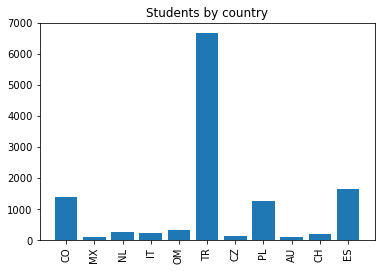

In [6]:
import matplotlib.pyplot as plt

country_ids = {}

for country in country_set:
    country_ids[country] = 0

for id in id_and_country:
    country_ids[id_and_country[id]] +=1
    
print (country_ids)

i = 0
for id in student_and_unit:
    print (student_and_unit[id])
    i+=1
    if i > 5 : break
        
filtered_countries = {}
for country in country_ids:
    if country_ids[country] > 100:
        filtered_countries[country] = country_ids[country]
        
plt.bar(range(len(filtered_countries)), filtered_countries.values(), align='center')
plt.xticks(range(len(filtered_countries)), filtered_countries.keys(), rotation = "vertical")
plt.title('Students by country')

plt.show()
    

Now I think it will be good to know how many times each unit is done, and what is the distribution of number of units done by each student. I think it is a good moment to introduce some visual tools. There are twelve units in total, four reviews and Video Podcasts. I think it will be safe to organiza this data in the way like this: 1, 2, 3 Review 1, 4, 5, 6, Review 2, 7, 8, 9, Review 3, 10, 11, 12, Review 4, Video Podcasts (seems to be a chronological order)

{'1': 11435, '2': 9273, '3': 8163, 'REVIEW 1': 5395, '4': 7136, '5': 6448, '6': 5916, 'REVIEW 2': 3827, '7': 5300, '8': 4834, '9': 3610, 'REVIEW 3': 2385, '10': 1757, '11': 1165, '12': 938, 'REVIEW 4': 483, 'VIDEO PODCASTS': 3367}


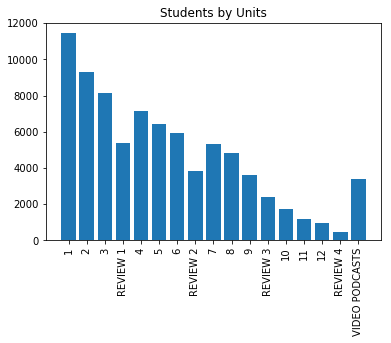

In [7]:
units_data = { '1': 0, '2': 0, '3': 0, 'REVIEW 1': 0, 
              '4': 0, '5': 0, '6': 0, 'REVIEW 2': 0, 
              '7': 0, '8': 0, '9': 0, 'REVIEW 3': 0, 
              '10': 0, '11': 0, '12': 0, 'REVIEW 4': 0, 'VIDEO PODCASTS' : 0}

for data_point in data:
    units_data[data_point['unit']] +=1
    
print (units_data)

plt.close()


plt.bar(range(len(units_data)), units_data.values(), align='center')
plt.xticks(range(len(units_data)), units_data.keys(), rotation = "vertical")
plt.title("Students by Units")

plt.show()

It looks like from 13158 students enrolled in the course, some of them decide to omitt the first unit (!), as there are only 11435 entries with this unit. Also the number of entries with next units is dropping rapidly - 9273 students have an entry with unit 2. Also it seems that students don't like doing reviews - less students has an entry with Review 1 than with lesson 4. Of course it may also mean, that there is a differents structure of the course than my assumption, however also number of students doing review is getting lower at every review.

I think there are many new questions to answer at this point:
1) who are the students who don't do unit 1, and do they have something in common?
2) how many students finish the course (they have all 12 units done, even if they ignore reviews), and if they have something in common?
3) As we know, most of the units are being done with the teachers supervision. So is this actually effective? It may be good idea to compare units done by students alone and by students being under supervision.

{'1': 0, '2': 302, '3': 435, 'REVIEW 1': 233, '4': 493, '5': 566, '6': 433, 'REVIEW 2': 175, '7': 547, '8': 520, '9': 460, 'REVIEW 3': 157, '10': 337, '11': 253, '12': 188, 'REVIEW 4': 49, 'VIDEO PODCASTS': 115}


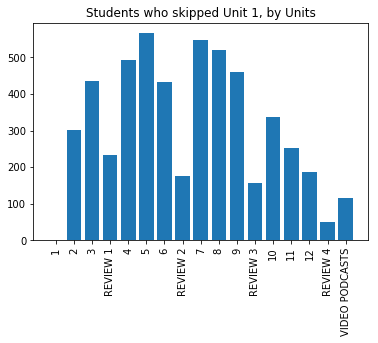

In [8]:
no_unit_one = {}
for student in student_and_unit:
    if "1" not in student_and_unit[student]:
        no_unit_one[student] = student_and_unit[student]
        
i = 0
        
no_unit_one_data = []
for data_point in data:
    if data_point['learner_id'] in no_unit_one.keys():
        no_unit_one_data.append(data_point)

no_unit_one_units = { '1': 0, '2': 0, '3': 0, 'REVIEW 1': 0, 
              '4': 0, '5': 0, '6': 0, 'REVIEW 2': 0, 
              '7': 0, '8': 0, '9': 0, 'REVIEW 3': 0, 
              '10': 0, '11': 0, '12': 0, 'REVIEW 4': 0, 'VIDEO PODCASTS' : 0}

for data_point in no_unit_one_data:
    no_unit_one_units[data_point['unit']] +=1
    
print (no_unit_one_units)


plt.close()

plt.bar(range(len(no_unit_one_units)), no_unit_one_units.values(), align='center')
plt.xticks(range(len(no_unit_one_units)), no_unit_one_units.keys(), rotation = "vertical")
plt.title("Students who skipped Unit 1, by Units")

plt.show()
        


It looks like students who decide not to do unit 1, also very often are not doing unit 2 and 3, they don't really care about Review 1. It is possible, that they think that they already know everything from units 1-3, and they just start later. Looking at the charts, it is safe to assume that students who don't do unit 1, are generally more engaged in the course than an average student is. OK, lets see how many students take all 12 units of the course (engagement is one thing, and completion is another - but there will be also time for working on completion later).

[2206, 1649, 1247, 1007, 908, 762, 619, 708, 484, 388, 800, 432, 1271, 282, 124, 108, 163]


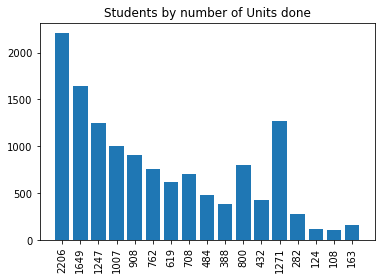

In [9]:
units_done = []
for i in range(0, 17): 
    units_done.append(0)
    
for student in student_and_unit:
    u = len(student_and_unit[student])
    units_done[u-1] +=1
    
print (units_done)

plt.close()

plt.bar(range(len(units_done)), units_done, align='center')
plt.xticks(range(len(units_done)), units_done, rotation = "vertical")
plt.title("Students by number of Units done")

plt.show()

Before we answer to the question how students with help of the teacher and without do compare, when it comes to the unit engagement, it is important to see if there are some students who work both with the teacher and without.

[1651, 1388, 1109, 904, 826, 691, 567, 660, 457, 364, 780, 413, 1243, 249, 110, 91, 141]


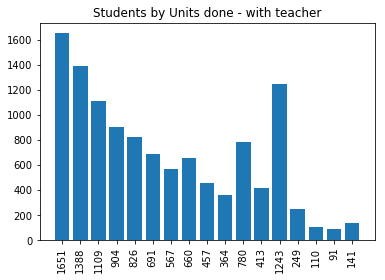

[555, 261, 138, 103, 82, 71, 52, 48, 27, 24, 20, 19, 28, 33, 14, 17, 22]


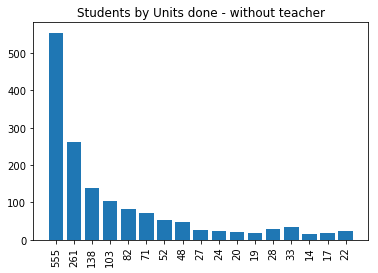

In [10]:
student_teacher = {}

for data_point in data:
    if data_point['learner_id'] not in student_teacher:
        student_teacher[data_point['learner_id']] = data_point['in_course']
    if data_point['learner_id'] in student_teacher:
        if student_teacher[data_point['learner_id']] != data_point['in_course']:
            print (data_point['learner_id'])
            
tStudents = {}
fStudents = {}

for student in student_and_unit:
    if student_teacher[student] == "t":
        tStudents[student] = student_and_unit[student]
    else:
        fStudents[student] = student_and_unit[student]
        
def show_units_done(unitData, title): 
    units_done = []
    for i in range(0, 17): 
        units_done.append(0)
    
    for student in unitData:
        u = len(unitData[student])
        units_done[u-1] +=1
    
    print (units_done)
    
    plt.bar(range(len(units_done)), units_done, align='center')
    plt.xticks(range(len(units_done)), units_done, rotation = "vertical")
    plt.title(title)

    plt.show()

plt.close()

show_units_done(tStudents, "Students by Units done - with teacher")

show_units_done(fStudents, "Students by Units done - without teacher")

    

There is no situation when the same students does some unit with teacher and other unit without him - which is logical, but in my opinion it is good to check some "obvious" things, as data may contain errors or inconsequences.

Also we can easily see, that when there is teacher involved, students show more engagement to the course, and many of them are doing 12 units, while without teacher there is a huge gap between 1 and 2 units, and the charts show how less motivated are students without supervision. 

I think now it is a good time to do some research on inv_rate (also compare  students with and without teacher) and completion rate. I will start with checking what is the average number of entries for each country (only for countries with 100+ students, stored in filtered_countries)

{'CO': 3.9806, 'MX': 4.8774, 'NL': 3.044, 'IT': 7.0595, 'OM': 2.6338, 'TR': 7.9155, 'CZ': 3.542, 'PL': 4.7174, 'AU': 3.456, 'CH': 2.6635, 'ES': 5.1274}


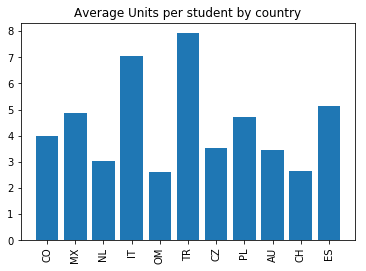

In [11]:
average_units_country = filtered_countries
for country in average_units_country:
    average_units_country[country] = 0
    
for country in average_units_country:
    x = country_numbers[country]
    y = country_ids[country]
    average_units_country[country] = round(x/y, 4)
    
print (average_units_country)

plt.close()

plt.bar(range(len(average_units_country)), average_units_country.values(), align='center')
plt.xticks(range(len(average_units_country)), average_units_country.keys(), rotation = "vertical")
plt.title("Average Units per student by country")

plt.show()
    


It looks like students from Turkey and Italy are much more motivated to work than students from other countries. At this point it could be good to know if it is somehow connected to course being under teachers supervision. 

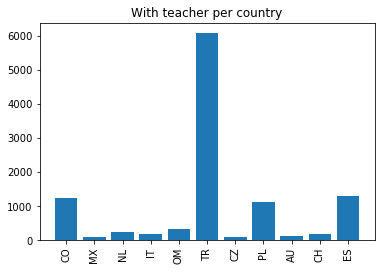

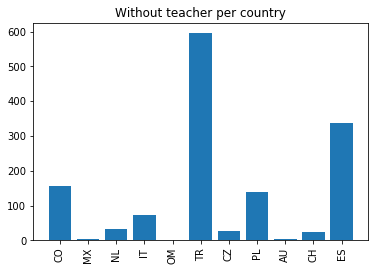

Teachers rate per country
CO Teachers rate:  0.89 Average units:  3.9806
MX Teachers rate:  0.97 Average units:  4.8774
NL Teachers rate:  0.88 Average units:  3.044
IT Teachers rate:  0.71 Average units:  7.0595
OM Teachers rate:  0.99 Average units:  2.6338
TR Teachers rate:  0.91 Average units:  7.9155
CZ Teachers rate:  0.8 Average units:  3.542
PL Teachers rate:  0.89 Average units:  4.7174
AU Teachers rate:  0.98 Average units:  3.456
CH Teachers rate:  0.88 Average units:  2.6635
ES Teachers rate:  0.79 Average units:  5.1274


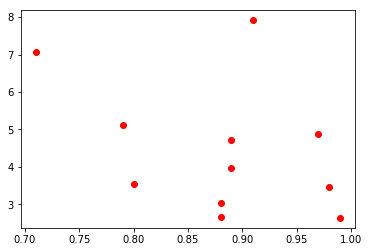

In [12]:
student_country = {}
for data_point in data:
    if data_point['learner_id'] not in student_country:
        student_country[data_point['learner_id']] = data_point['country']


no_teacher_student_country = {}
teacher_student_country = {}
for country in filtered_countries:
    no_teacher_student_country[country]= 0
    teacher_student_country[country]= 0
    
for key, value in student_country.items():
    if student_teacher[key] == "t":
        if value in teacher_student_country:
            teacher_student_country[value] +=1
    else:
        if value in no_teacher_student_country:
            no_teacher_student_country[value] +=1
            
plt.close()

def show_students_per_country(students, title):
    
    plt.bar(range(len(students)), students.values(), align='center')
    plt.xticks(range(len(students)), students.keys(), rotation = "vertical")
    plt.title(title)
    plt.show()
    
show_students_per_country(teacher_student_country, "With teacher per country")
show_students_per_country(no_teacher_student_country, "Without teacher per country")

print("Teachers rate per country")
teachers_rate = []
ave_units = []

for country in filtered_countries:
    x = teacher_student_country[country]
    y = no_teacher_student_country[country]
    teachers_rate.append(round(x/(x+y), 2))
    ave_units.append(average_units_country[country])
    print(country,"Teachers rate: ", round(x/(x+y), 2), "Average units: ", average_units_country[country])

plt.close()

plt.plot(teachers_rate, ave_units, 'ro')
plt.show()
    

At this point some small conclusions can be already made. The supervision factor (teacher participation in course) works for Turkey students very well, but this is an exception - there are many countries with bigger (or similar) "supervision rate", that have much smaller average number of units done. Also, there is Italy, with lowest teachers rate and still very high average number of units. Generally, it shows that there are differences between countries, but it would be very hard to find the correlation of these two values.


Now lets explore how variables like completion, average score and "freedom rate" (inv_rate) are connected to the specific units - the best way to represent data like this is probably using the scatter plots.

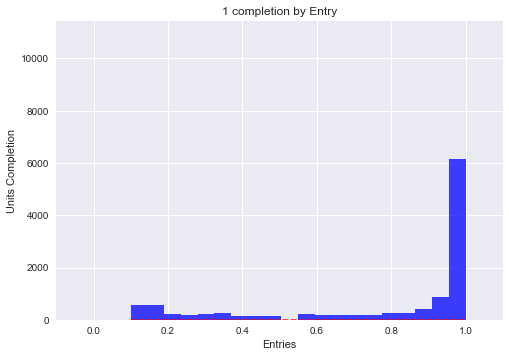

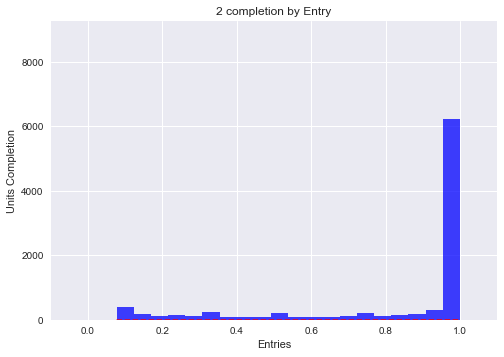

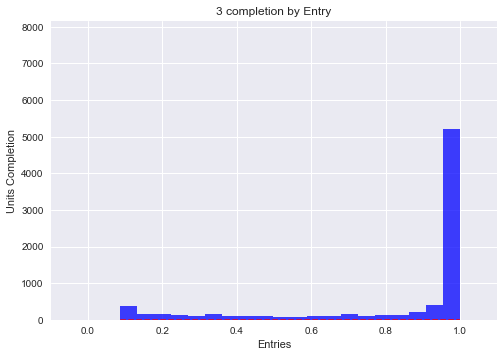

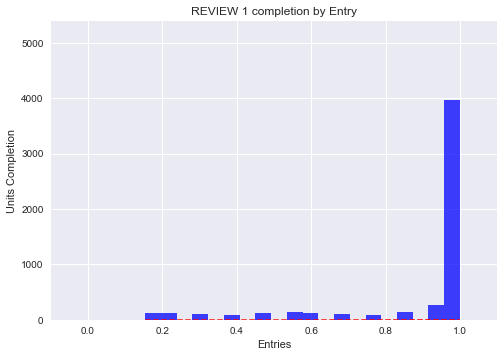

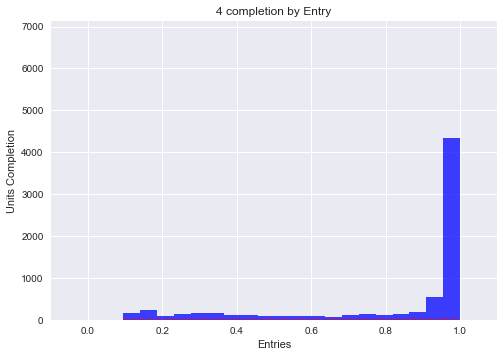

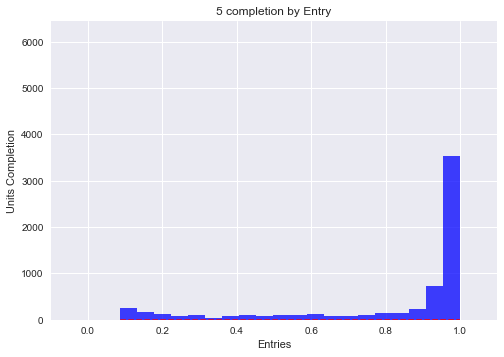

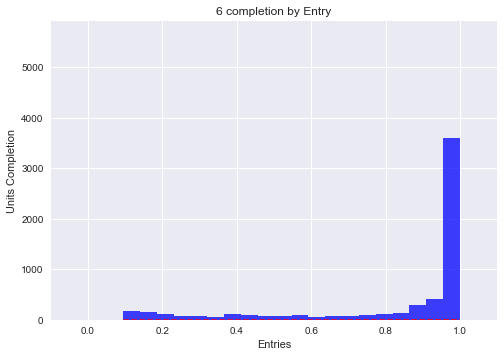

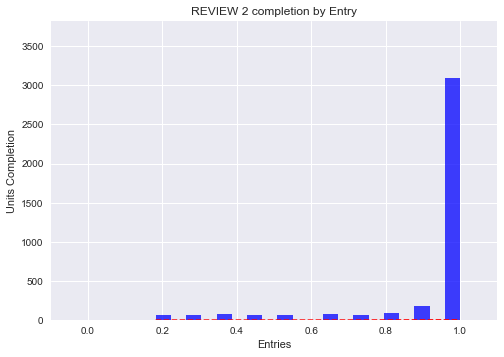

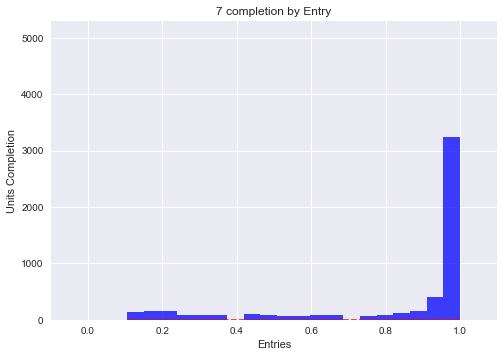

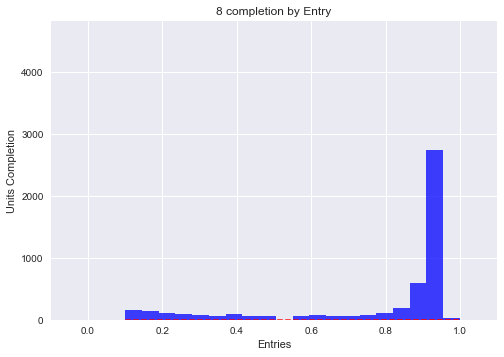

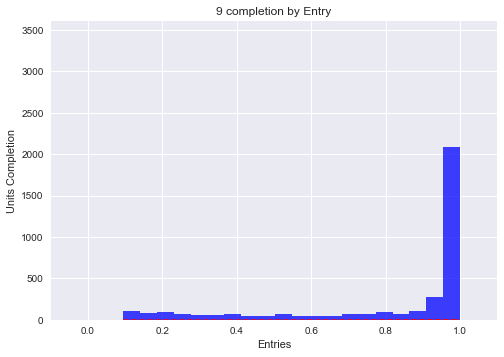

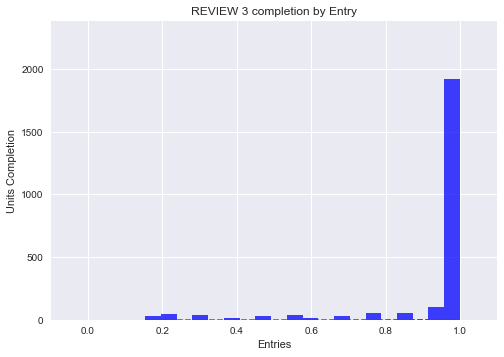

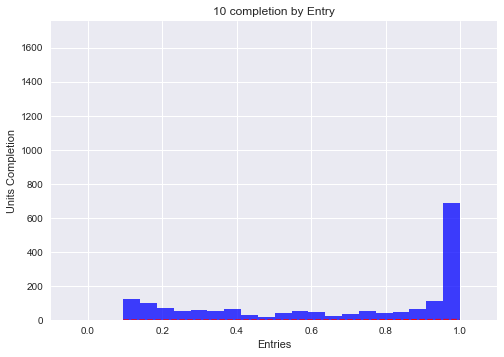

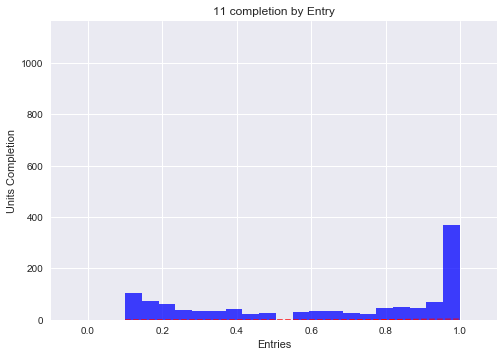

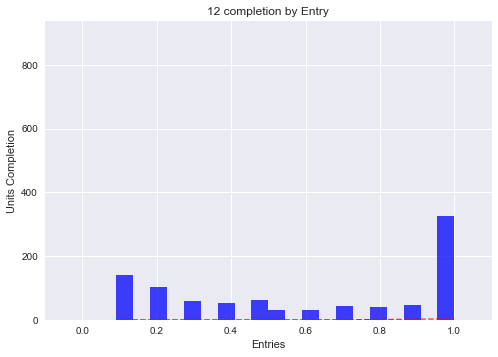

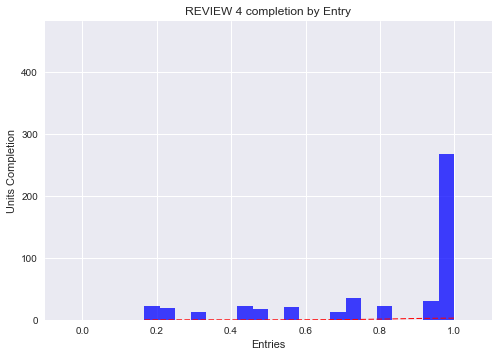

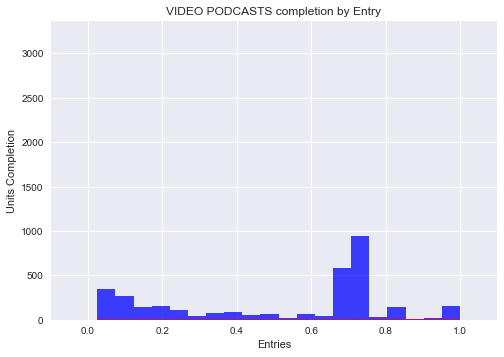

In [24]:
import numpy as np

unit_ids = {}
i = 1

unit_completion_data = {}
unit_average_data = {}
unit_freedom_data = {}

no_teacher_freedom_data = {}

for unit in units_data:
    unit_completion_data[unit] = []
    unit_average_data[unit] = []
    unit_freedom_data[unit] = []
    no_teacher_freedom_data[unit] = []
    unit_ids[unit] = i
    i+=1
    
for dp in data:
    unit_completion_data[dp['unit']].append(dp['completion'])
    unit_average_data[dp['unit']].append(dp['avg_score'])
    unit_freedom_data[dp['unit']].append(dp['inv_rate'])
    if dp['in_course'] == 'f':
        no_teacher_freedom_data[dp['unit']].append(dp['inv_rate'])

import matplotlib.mlab as mlab

def get_unit_by_id(unit_id):
    for unit in unit_ids:
        if unit_ids[unit] == unit_id:
            return unit
    return "error"
    

def show_unit_completion_histogram(unit_id):
    mu, sigma = 1, 0.15
    x = unit_completion_data[get_unit_by_id(unit_id)]
    n, bins, patches = plt.hist(x, 20, normed=0, facecolor='blue', alpha=0.75)
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=1)

    plt.xlabel('Entries')
    plt.ylabel('Units Completion')
    plt.title(get_unit_by_id(unit_id)+' completion by Entry')
    plt.axis([-0.1, 1.1, 0, len(x)])
    plt.grid(True)
    plt.show()

for i in range(1, 18):    
    show_unit_completion_histogram(i)
    



As we can see on these (not so perfect) histograms, it appears that unit completions drops gradually until the unit 10, where drop becomes more significant, especially in comparison to completion of Review 3. It may be the signal that something bad happens there - students apparently start the unit 10, but they are having big problems with completing it. One of the possible reasons for this can be teachers - they have not enough time to go through the whole course with their class, so they do as much as possible (9 units and reviews), and then stop - that would explain the reason why students are much less likely to complete next three units. However, the completion is a metric of engagement, but average_score is the metric that can be much more revaling, and we can present it in a very similar way.

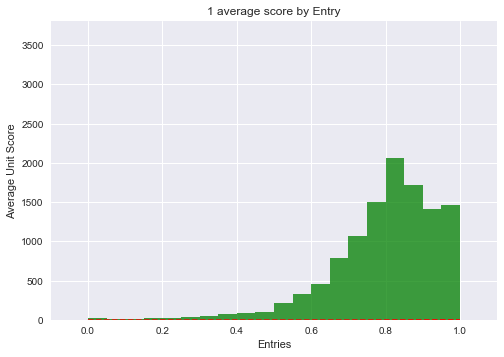

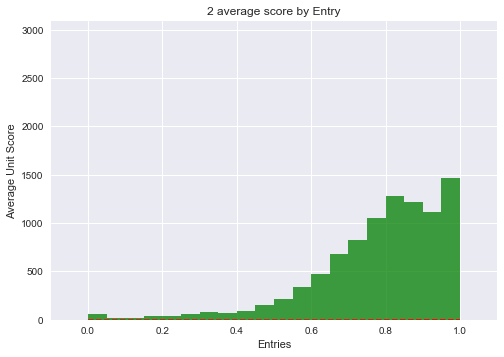

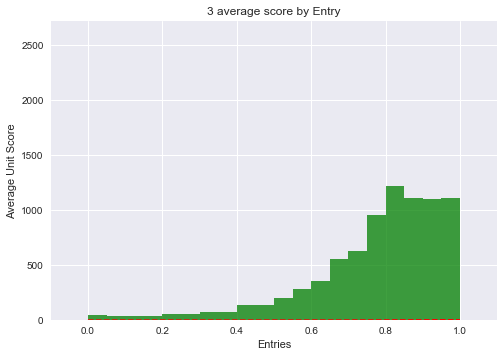

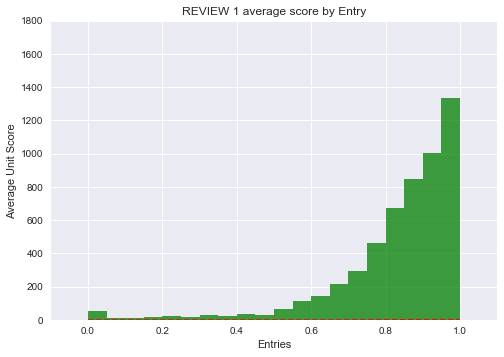

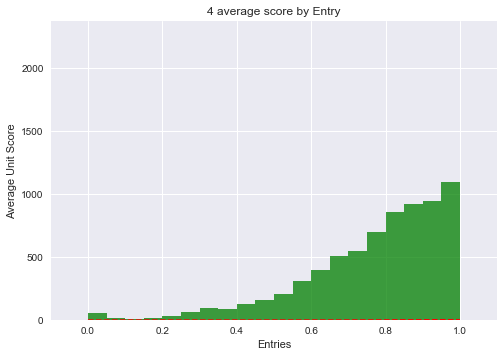

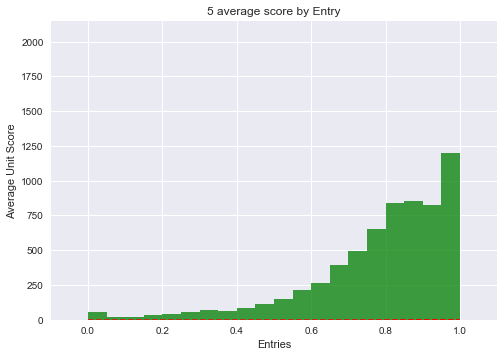

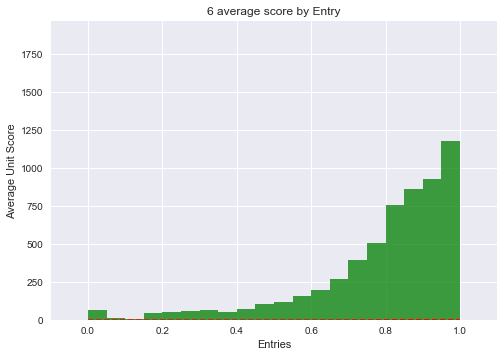

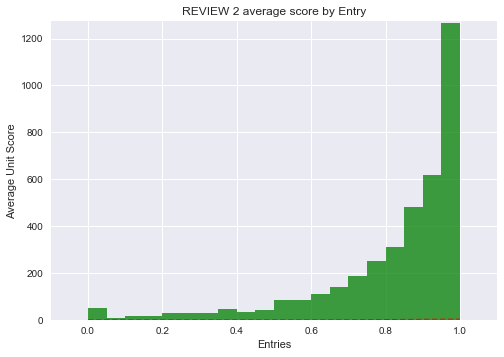

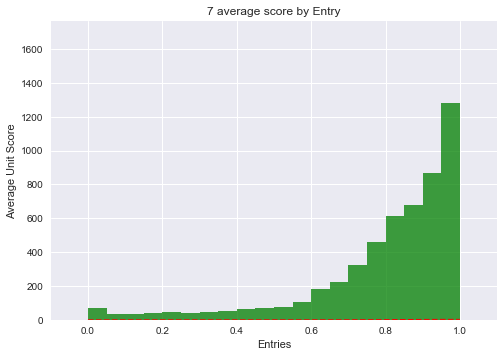

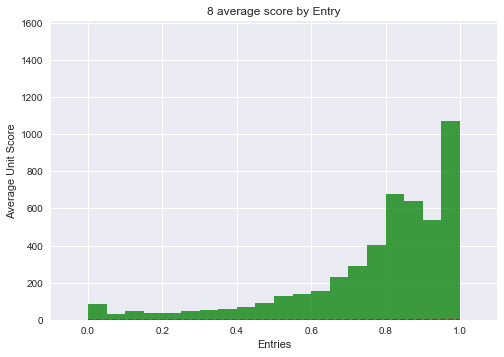

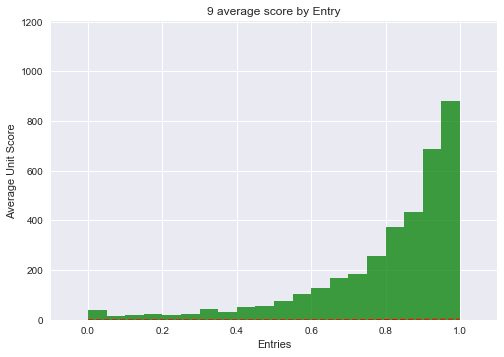

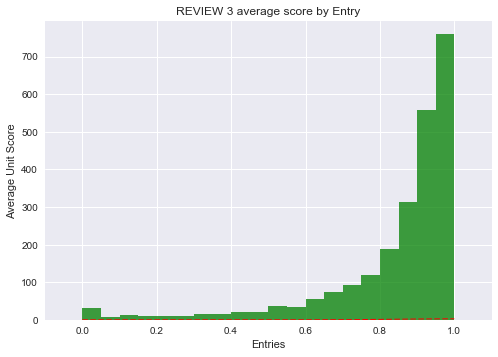

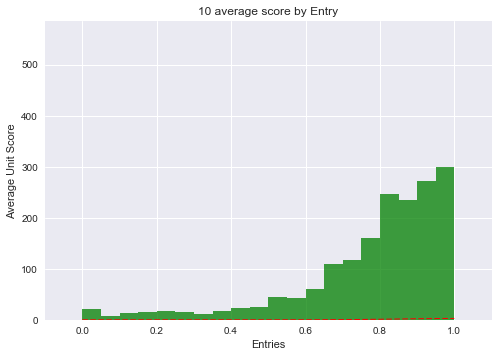

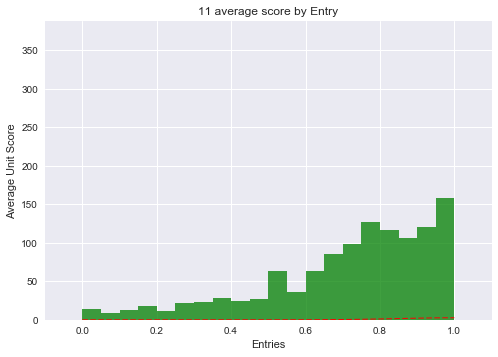

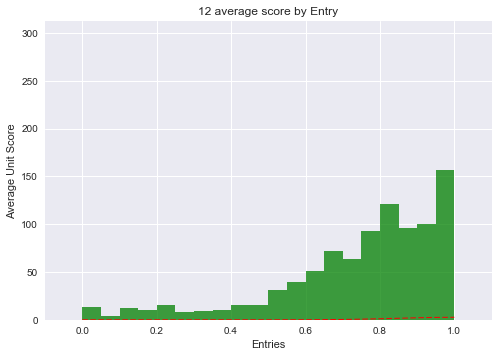

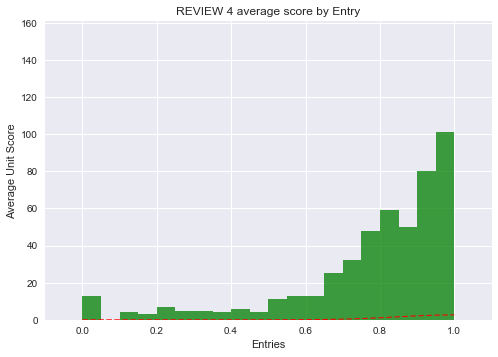

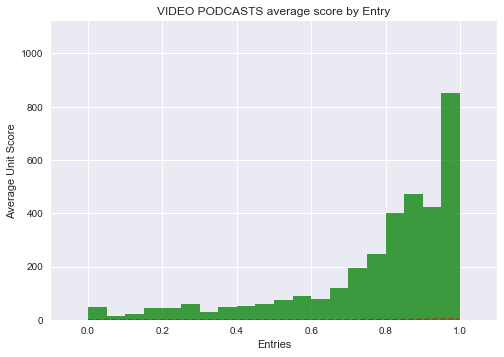

In [18]:
plt.close()

def show_unit_average_histogram(unit_id):
    mu, sigma = 1, 0.15
    x = unit_average_data[get_unit_by_id(unit_id)]
    n, bins, patches = plt.hist(x, 20, normed=0, facecolor='green', alpha=0.75)
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=1)

    plt.xlabel('Entries')
    plt.ylabel('Average Unit Score')
    plt.title(get_unit_by_id(unit_id)+' average score by Entry')
    plt.axis([-0.1, 1.1, 0, len(x)/2])
    plt.grid(True)
    plt.show()

for i in range(1, 18):    
    show_unit_average_histogram(i)

It looks like while at the beginning of the course it is harder for students to achieve top scores from unit, however after few units, the % of the students who achieve the best possible score starts growing. Of course it is connected with the fact, that total number of students is dropping, and it is not a surprise, that students who decide to continue course are the ones with better scores. Also the % of students having problems grows from unit to unit, especially after 9th unit (so it would be a good idea to compare it with completion rate). Unfortunately, the time is running, and I still want to check some other things, like inv_rate by unit.

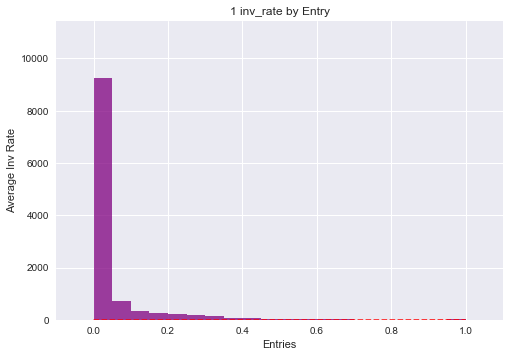

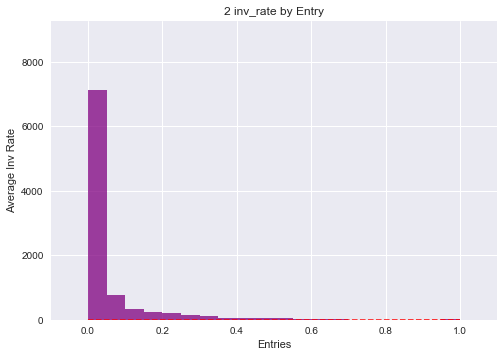

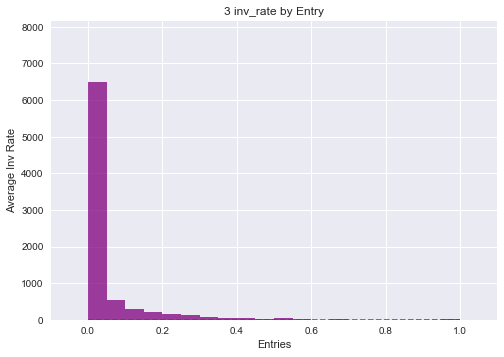

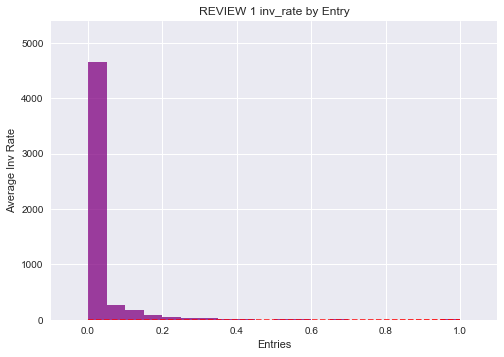

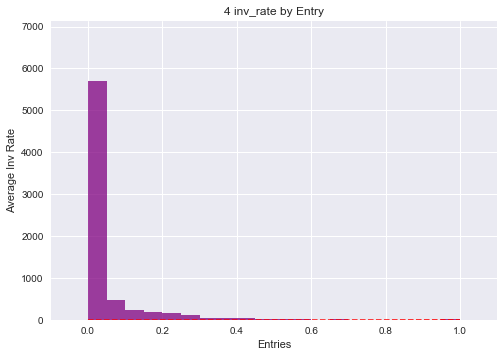

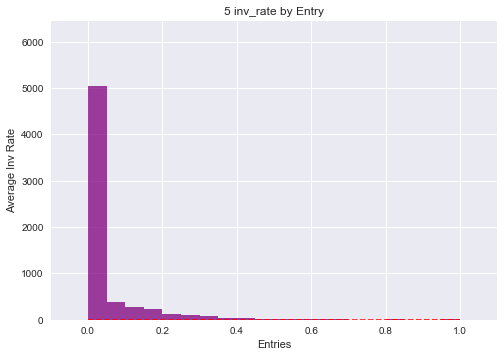

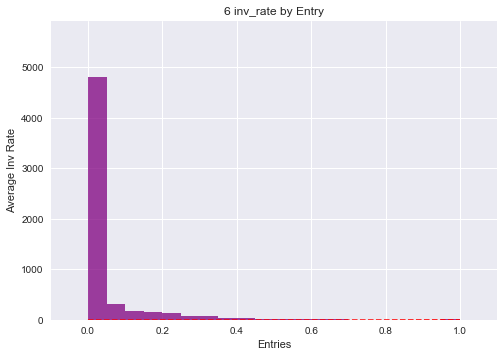

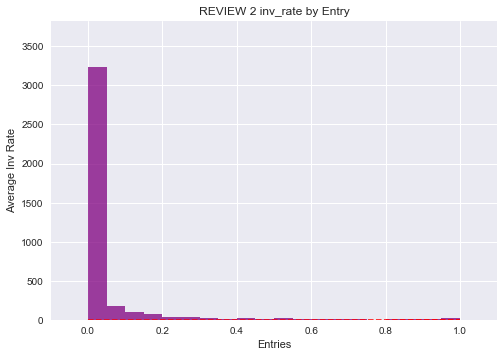

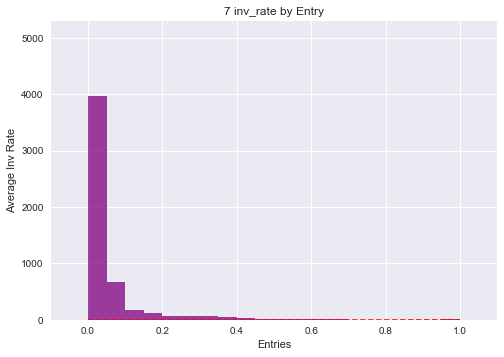

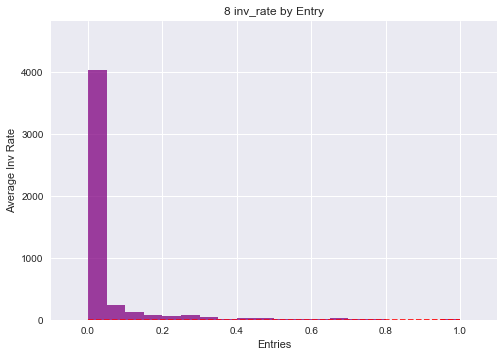

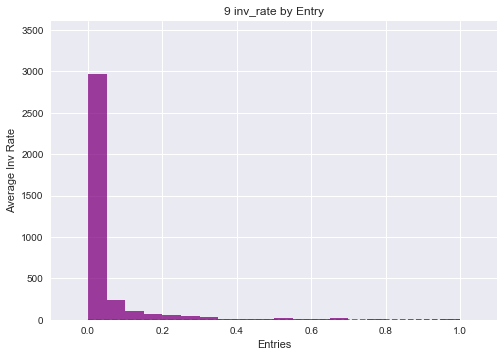

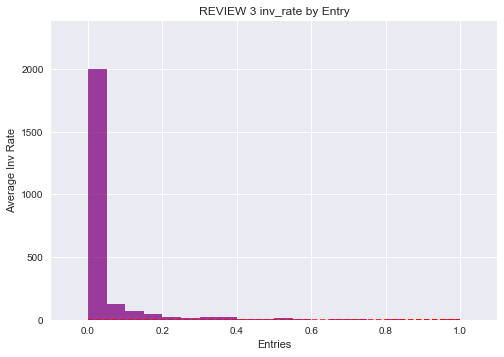

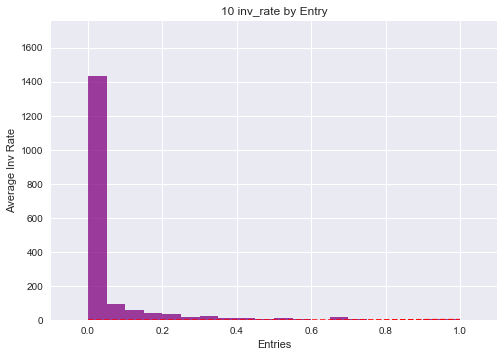

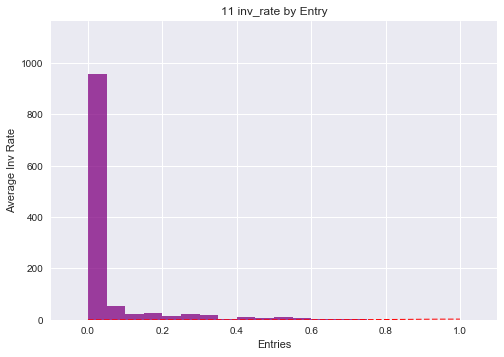

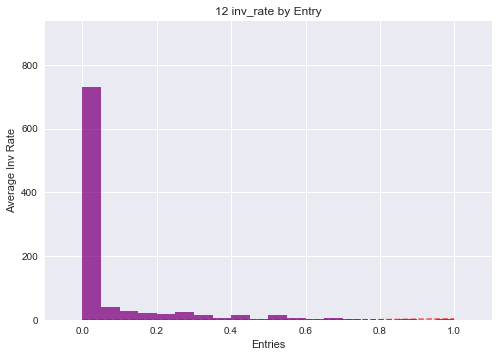

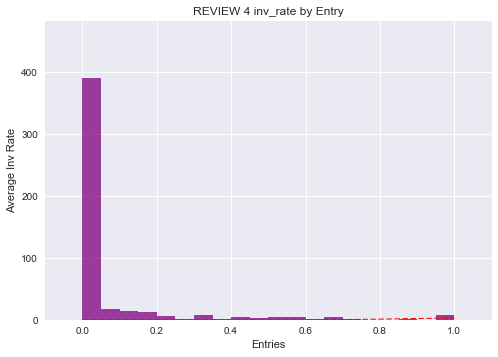

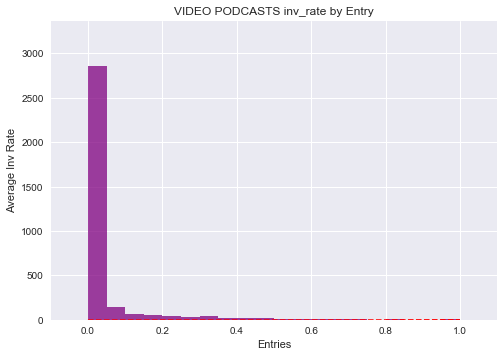

In [25]:
plt.close()
def show_freedom_histogram(unit_id, x):
    mu, sigma = 1, 0.15
    
    n, bins, patches = plt.hist(x, 20, normed=0, facecolor='purple', alpha=0.75)
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=1)

    plt.xlabel('Entries')
    plt.ylabel('Average Inv Rate')
    plt.title(get_unit_by_id(unit_id)+' inv_rate by Entry')
    plt.axis([-0.1, 1.1, 0, len(x)])
    plt.grid(True)
    plt.show()
    


for i in range(1, 18):
    x = unit_freedom_data[get_unit_by_id(i)]
    show_freedom_histogram(i, x)

Generally the inv_rate is very low, which is not a big suprise if we keep in mind, that most of the units are being done under the teachers supervision. So maybe it will be a good idea to also see how does inv_rate for unsupervised units looks like?

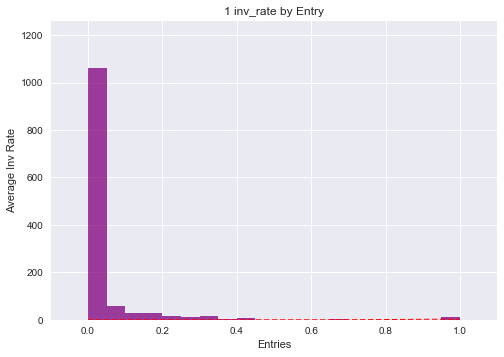

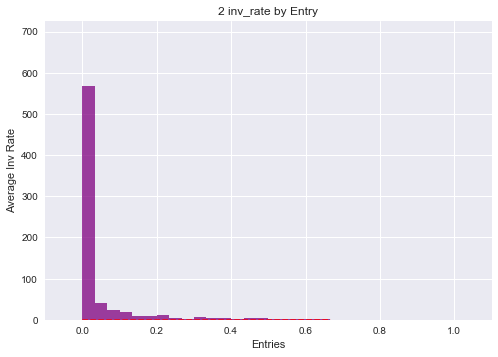

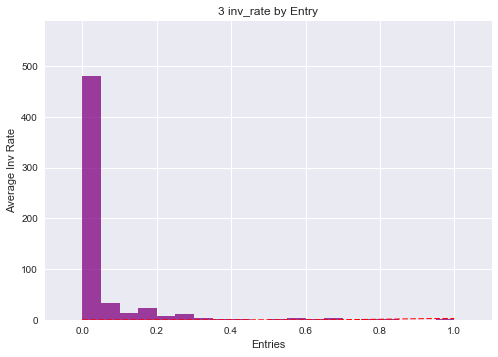

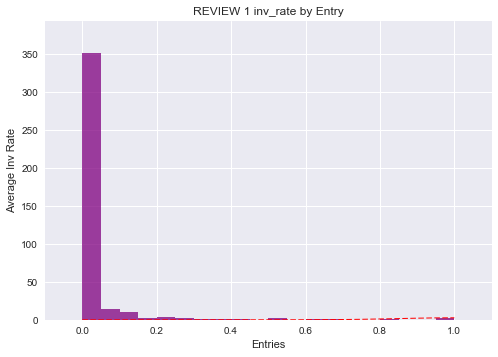

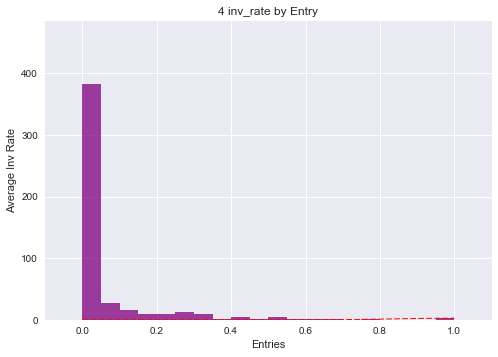

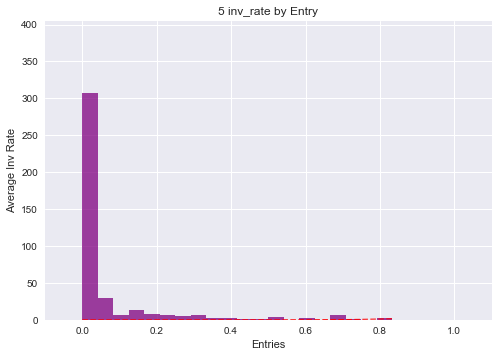

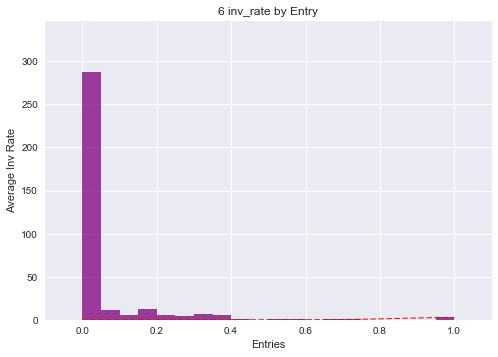

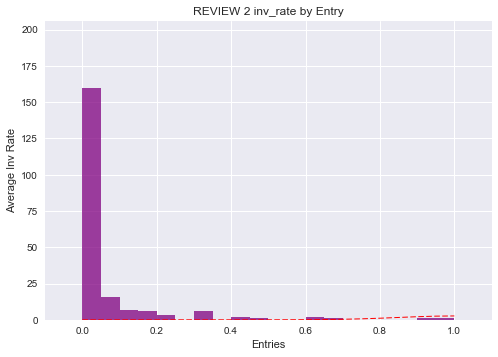

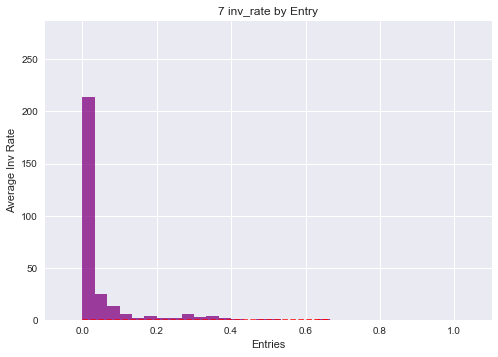

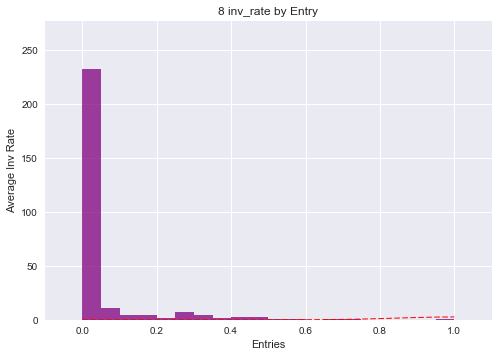

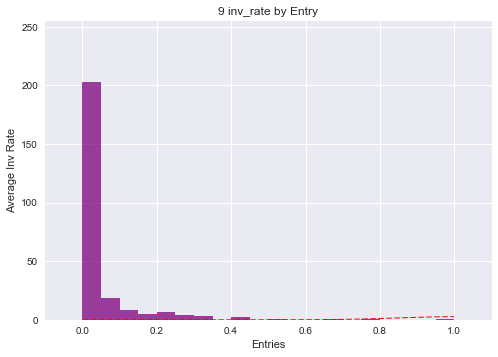

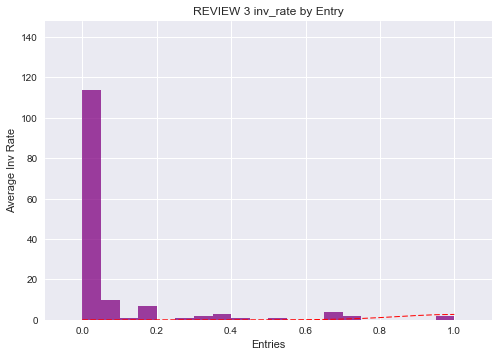

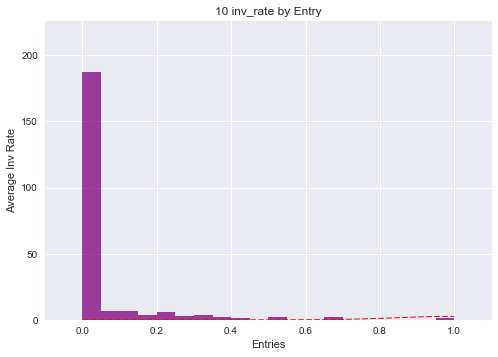

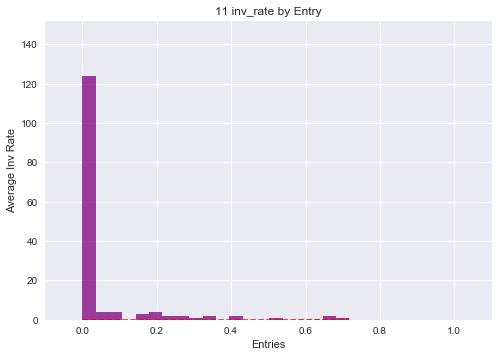

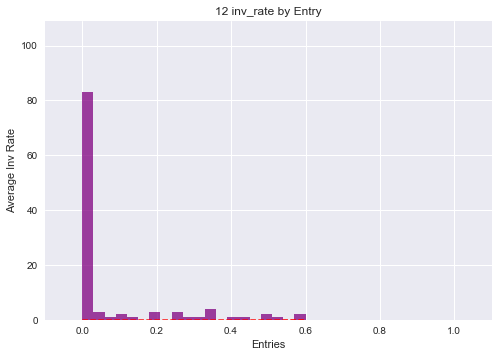

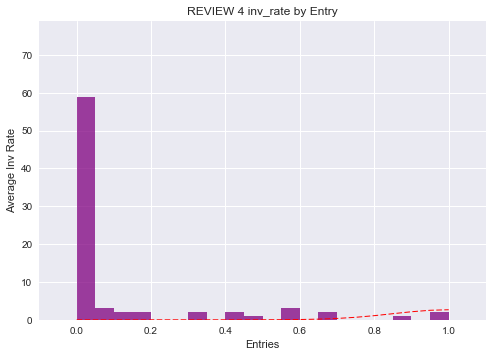

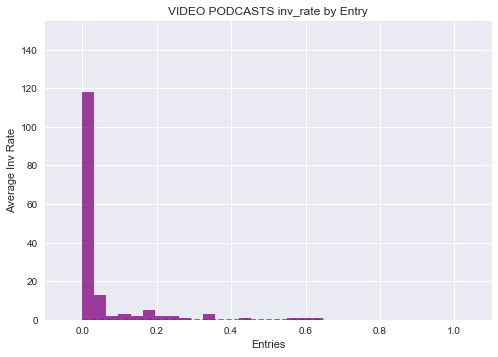

In [26]:
plt.close()

for i in range(1, 18):
    x = no_teacher_freedom_data[get_unit_by_id(i)]
    show_freedom_histogram(i, x)

As wee can see, these results are very close to the above, which means that being in course with the teacher doesn't have a big impact on inv_rate. I would be happy to investigate more, because what I did so far is only a good warm-up, but I'm out of time for this task, so it will be the good idea to gather the conclusions in a more convenient form.